<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Importamos los datos

X_train = pd.read_csv("./DatosAbandonoSinPondSinNan/X_train.csv", sep=',', decimal='.')
y_train = pd.read_csv("./DatosAbandonoSinPondSinNan/y_train.csv", sep=',', decimal='.')
X_val = pd.read_csv("./DatosAbandonoSinPondSinNan/X_val.csv", sep=',', decimal='.')
y_val = pd.read_csv("./DatosAbandonoSinPondSinNan/y_val.csv", sep=',', decimal='.')
X_test = pd.read_csv("./DatosAbandonoSinPondSinNan/X_test.csv", sep=',', decimal='.')
y_test = pd.read_csv("./DatosAbandonoSinPondSinNan/y_test.csv", sep=',', decimal='.')


features = X_train.columns

In [9]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
#scaler = preprocessing.Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Vemos si somos capaces de mejorar los algoritmos por defecto aplicando GridSearchCV

In [10]:
start_time = time.time()

dt = DecisionTreeClassifier(random_state = 0)

gs_dt = GridSearchCV(dt,
                    param_grid = {"max_depth" : range(2, 10), 
                                  "min_samples_split": range(4, 10, 2)},
                    scoring = None,
                    cv = 5)
gs_dt.fit(X_train, y_train)
gs_dt.best_estimator_

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  27.58308434486389


In [11]:
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_split=4, random_state=0)

In [12]:
gs_dt.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [13]:
start_time = time.time()

rf = RandomForestClassifier(random_state=0)
gs_rf = GridSearchCV(rf,
                    param_grid = {"max_depth": range(2,6), "min_samples_split": range(4,6,2), "n_estimators": range(100, 251, 50)},
                    scoring = None,
                    cv = 5)
gs_rf.fit(X_train, y_train)

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  276.514408826828


In [14]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_split=4, n_estimators=150,
                       random_state=0)

In [15]:
gs_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [16]:
start_time = time.time()

et = ExtraTreesClassifier(random_state=0)
gs_et = GridSearchCV(et,
                    param_grid = {"max_depth": range(2,6), "min_samples_split": range(4,10,2), "n_estimators": range(100, 251, 50)},
                    scoring = None,
                    cv = 5)
gs_et.fit(X_train, y_train)

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  112.43911528587341


In [17]:
gs_et.best_estimator_

ExtraTreesClassifier(max_depth=2, min_samples_split=4, random_state=0)

In [18]:
gs_et.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [19]:
print("DecisionTreeClassifier best score:", gs_dt.best_score_)
print("RandomForestClassifier best score:", gs_rf.best_score_)
print("ExtraTreesClassifier best score:", gs_et.best_score_)

DecisionTreeClassifier best score: 0.9741175263537147
RandomForestClassifier best score: 0.9744468203531065
ExtraTreesClassifier best score: 0.9743809442002739


In [20]:
grid_predictions_dt = gs_dt.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_dt))
print(confusion_matrix(y_test, grid_predictions_dt))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4652
           1       0.00      0.00      0.00       110
           2       0.00      0.00      0.00         6

    accuracy                           0.98      4768
   macro avg       0.33      0.33      0.33      4768
weighted avg       0.95      0.98      0.96      4768

[[4652    0    0]
 [ 110    0    0]
 [   6    0    0]]


In [21]:
grid_predictions_rf = gs_rf.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_rf))
print(confusion_matrix(y_test, grid_predictions_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4652
           1       0.00      0.00      0.00       110
           2       0.00      0.00      0.00         6

    accuracy                           0.98      4768
   macro avg       0.33      0.33      0.33      4768
weighted avg       0.95      0.98      0.96      4768

[[4652    0    0]
 [ 110    0    0]
 [   6    0    0]]


In [22]:
grid_predictions_et = gs_et.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_et))
print(confusion_matrix(y_test, grid_predictions_et))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4652
           1       0.00      0.00      0.00       110
           2       0.00      0.00      0.00         6

    accuracy                           0.98      4768
   macro avg       0.33      0.33      0.33      4768
weighted avg       0.95      0.98      0.96      4768

[[4652    0    0]
 [ 110    0    0]
 [   6    0    0]]


In [23]:
from joblib import dump, load
dump(gs_dt, 'gs_dt_st.joblib') 
dump(gs_rf, 'gs_rf_st.joblib') 
dump(gs_et, 'gs_et_st.joblib') 

['gs_et_st.joblib']

### Decision Tree Classifier

In [24]:
start_time = time.time()

dt = DecisionTreeClassifier(
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 2,
    max_features = None,
    max_leaf_nodes = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 4,
    min_weight_fraction_leaf = 0.0,
    random_state =  0,
    splitter = 'best')

dt_score = cross_val_score(dt, X_train, y_train, cv = 5).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", dt_score)

Tiempo:  0.4948713779449463
Score:  0.9741175263537147


In [25]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=4, random_state=0)

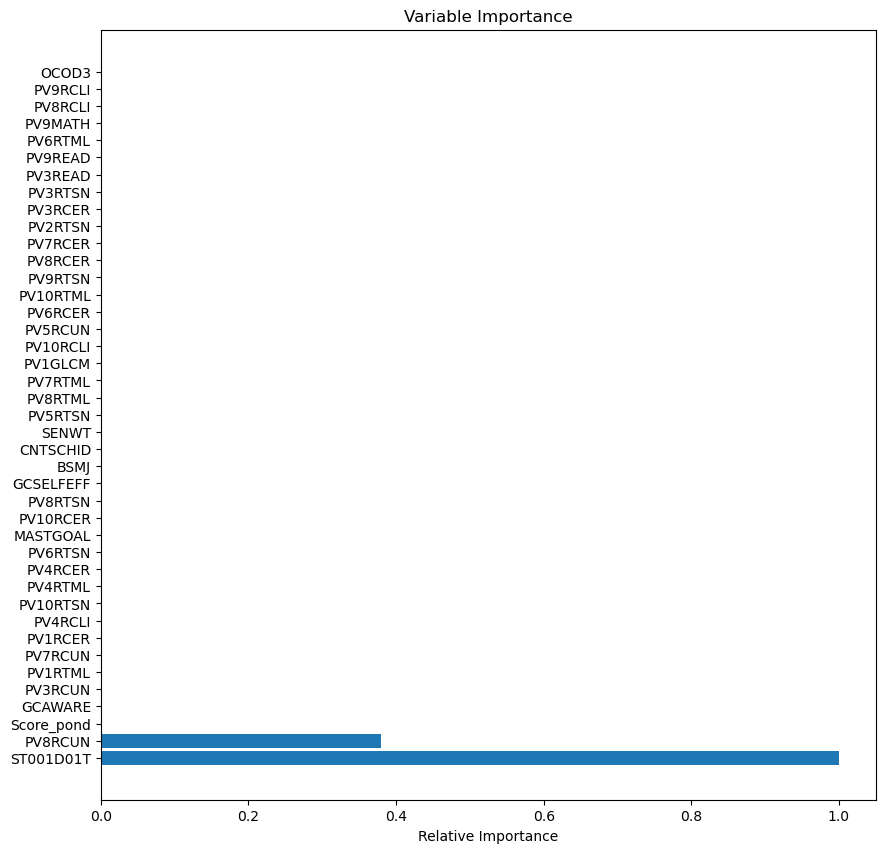

In [26]:
importances = dt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Esto es normal que ocurra porque el árbol de decisión no tiene encuenta nuestra variable para formar el árbol

### Random Forest Classifier

In [27]:
start_time = time.time()

#rf = RandomForestClassifier(max_depth=5, min_samples_split=4, random_state=0) 
rf = RandomForestClassifier(
    bootstrap = True,
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 4,
    max_features = 'sqrt',
    max_leaf_nodes = None,
    max_samples = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 4,
    min_weight_fraction_leaf = 0.0,
    n_estimators =  150,
    n_jobs = None,
    oob_score = False,
    random_state = 0,
    verbose = 0,
    warm_start = False)

rf_score = cross_val_score(rf, X_train, y_train, cv = 10).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", rf_score)

Tiempo:  33.963749170303345
Score:  0.974380985340713


In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=4, n_estimators=150,
                       random_state=0)

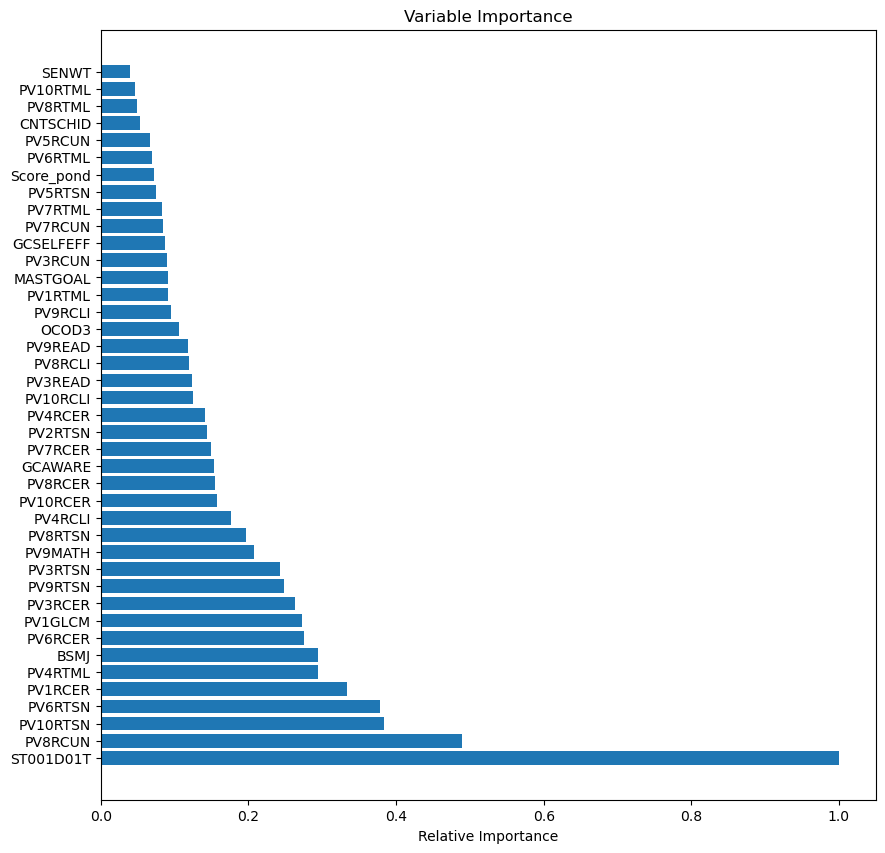

In [29]:
importances = rf.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [30]:
valores = list(zip(importances[indices], features[indices]))

def clave_ordenacion(tupla):
  return (-tupla[0], tupla[1])

sorted(valores, key=clave_ordenacion)

[(1.0, 'ST001D01T'),
 (0.4899725427608657, 'PV8RCUN'),
 (0.3833444636729231, 'PV10RTSN'),
 (0.378014281130166, 'PV6RTSN'),
 (0.3330209317688379, 'PV1RCER'),
 (0.2947379874790296, 'PV4RTML'),
 (0.29466486424632915, 'BSMJ'),
 (0.27549984286585716, 'PV6RCER'),
 (0.27225350901442114, 'PV1GLCM'),
 (0.2636202475153796, 'PV3RCER'),
 (0.2485883092512346, 'PV9RTSN'),
 (0.24307087041305483, 'PV3RTSN'),
 (0.20809840825634152, 'PV9MATH'),
 (0.19673769484857825, 'PV8RTSN'),
 (0.17657834967352057, 'PV4RCLI'),
 (0.1579089519359009, 'PV10RCER'),
 (0.15487364434037565, 'PV8RCER'),
 (0.15318864845511912, 'GCAWARE'),
 (0.14988781183169136, 'PV7RCER'),
 (0.1435938948846114, 'PV2RTSN'),
 (0.14096708220968848, 'PV4RCER'),
 (0.12520726407337454, 'PV10RCLI'),
 (0.12282148994050227, 'PV3READ'),
 (0.11900782760496405, 'PV8RCLI'),
 (0.11767243511457677, 'PV9READ'),
 (0.10572321171424769, 'OCOD3'),
 (0.09509920777296511, 'PV9RCLI'),
 (0.09064411884782761, 'PV1RTML'),
 (0.09035645828234933, 'MASTGOAL'),
 (0.089665

### Extra Trees Classifier

In [31]:
start_time = time.time()

et = ExtraTreesClassifier( 
    bootstrap = False,
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 2,
    max_features = 'sqrt',
    max_leaf_nodes = None,
    max_samples = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 4,
    min_weight_fraction_leaf = 0.0,
    n_estimators =  100,
    n_jobs = None,
    oob_score = False,
    random_state = 0,
    verbose = 0,
    warm_start = False)
 

et_score = cross_val_score(et, X_train, y_train, cv = 10).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", et_score)

Tiempo:  2.090085029602051
Score:  0.9743809419726072


In [32]:
et.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=2, min_samples_split=4, random_state=0)

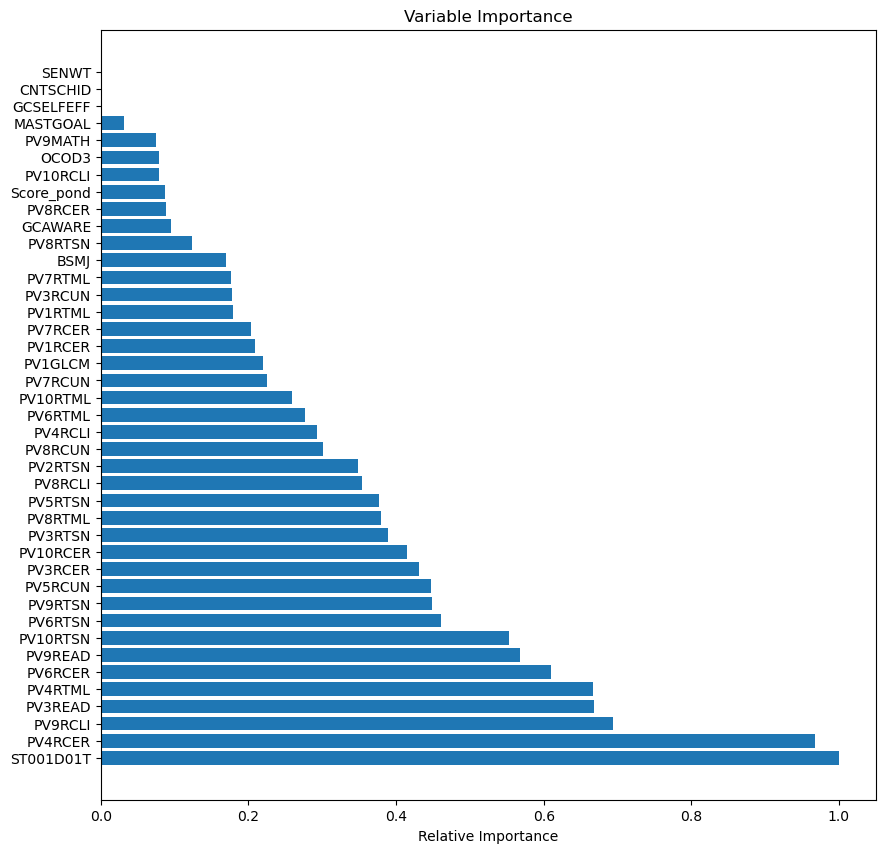

In [33]:
importances = et.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [34]:
valores = list(zip(importances[indices], features[indices]))

def clave_ordenacion(tupla):
  return (-tupla[0], tupla[1])

sorted(valores, key=clave_ordenacion)

[(1.0, 'ST001D01T'),
 (0.9680503950361418, 'PV4RCER'),
 (0.6942670991186842, 'PV9RCLI'),
 (0.6681922240955506, 'PV3READ'),
 (0.6662735040289064, 'PV4RTML'),
 (0.6099909320997072, 'PV6RCER'),
 (0.5672928401542042, 'PV9READ'),
 (0.552382619110113, 'PV10RTSN'),
 (0.46019182346130505, 'PV6RTSN'),
 (0.4485756681956699, 'PV9RTSN'),
 (0.44682649722347134, 'PV5RCUN'),
 (0.43116354185621036, 'PV3RCER'),
 (0.4145016410938014, 'PV10RCER'),
 (0.38945665784806055, 'PV3RTSN'),
 (0.38015631288916596, 'PV8RTML'),
 (0.37629705988792994, 'PV5RTSN'),
 (0.35378550130188136, 'PV8RCLI'),
 (0.34873151155627147, 'PV2RTSN'),
 (0.30092290466122296, 'PV8RCUN'),
 (0.2924836272276181, 'PV4RCLI'),
 (0.2761713065508882, 'PV6RTML'),
 (0.2585899543132381, 'PV10RTML'),
 (0.22560749561546498, 'PV7RCUN'),
 (0.21960430055905097, 'PV1GLCM'),
 (0.20919752525474683, 'PV1RCER'),
 (0.20405958581798778, 'PV7RCER'),
 (0.179578225363042, 'PV1RTML'),
 (0.17820021854995283, 'PV3RCUN'),
 (0.17657679173084134, 'PV7RTML'),
 (0.1690314

In [35]:
from joblib import dump, load
dump(dt, 'dt_st.joblib') 
dump(rf, 'rf_st.joblib') 
dump(et, 'et_st.joblib') 
dump(scaler, 'scaler_st.joblib') 

['scaler_st.joblib']

In [36]:
#!pip install pipreqs

In [37]:
#!pip freeze > requirements.txt

In [38]:
#!pip freeze 

In [39]:
""" %%writefile requirements.txt

apache-beam[gcp]==2.24.0
tensorflow
gensim==3.6.0
fsspec==0.8.4
gcsfs==0.7.1
numpy==1.20.0 """

' %%writefile requirements.txt\n\napache-beam[gcp]==2.24.0\ntensorflow\ngensim==3.6.0\nfsspec==0.8.4\ngcsfs==0.7.1\nnumpy==1.20.0 '

In [40]:
#!pip install -r requirements.txt